In [2]:
import numpy as np
import pandas as pd
import ee
import requests
import os
import geopandas as gpd
# Initialize the Earth Engine API
ee.Initialize(project='ts-rishimnb')


In [3]:
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
bbox = gdf.total_bounds
print(bbox)

[78.00405826 16.93264351 79.04971836 17.90150706]


In [4]:
# ee.Initialize()

# # Define the area of interest (AOI) using coordinates
# bbox = ee.Geometry.Rectangle([78.00405826, 16.93264351, 79.04971836, 17.90150706])  # Example coordinates

# # Choose the Sentinel-2 image collection and filter by date and bounds
# image_collection = ee.ImageCollection("MODIS/061/MOD11A1") \
#     .filterBounds(bbox) \
#     .filterDate('2022-03-16', '2022-03-1') \

# img =image_collection.mean()
# # Specify the bands to download (e.g., true color bands B4, B3, B2)
# url = img.getDownloadUrl({
#     'bands': [
#     "LST_Day_1km"],
#     'region': bbox,
#     'scale': 1000,
#     'format': 'GEO_TIFF'
# })
# response = requests.get(url)
# with open('modis_lst.tif', 'wb') as fd:
#   fd.write(response.content)

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

cities=["Delhi","Hyderabad", "Mumbai", "Bangalore","Kolkata","Chennai","Pune",\
        "Kanpur","Surat","Ahmedabad"]
months = {
        1: ("January", 31),
        2: ("February", 28),
        3: ("March", 31),
        4: ("April", 30),
        5: ("May", 31),
        6: ("June", 30),
        7: ("July", 31),
        8: ("August", 31),
        9: ("September", 30),
        10: ("October", 31),
        11: ("November", 30),
        12: ("December", 31)
    }
year=2018
for city in cities:
    for month in months:
        try:
            geo_tiff_path = fr"/home/f20222001/test-venv/UHI/Landsat_{year-2000}/{city}/LST/{months[month][0]}.tif"
            with rasterio.open(geo_tiff_path) as src:
                lst_raw = src.read(1).astype(float)
                print(src.shape[0]*src.shape[1])
        except:
            print("womp womp")

83600
83600
83600
83600
83600
83600
83600
83600
83600
83600
83600
83600
241108
241108
241108
241108
241108
241108
womp womp
241108
241108
241108
241108
241108
97482
97482
97482
97482
97482
97482
womp womp
97482
97482
97482
97482
97482
274890
274890
274890
274890
274890
274890
274890
274890
274890
274890
274890
274890
47498
47498
womp womp
47498
47498
47498
47498
47498
47498
47498
47498
47498
135468
135468
135468
135468
135468
135468
135468
135468
135468
135468
135468
135468
68724
68724
womp womp
68724
68724
68724
womp womp
womp womp
68724
68724
68724
68724
61846
61846
61846
61846
61846
61846
61846
61846
61846
61846
61846
61846
67479
67479
67479
67479
67479
67479
womp womp
67479
67479
67479
67479
67479
73884
73884
73884
73884
73884
73884
73884
73884
73884
73884
73884
73884


In [6]:
# ee.Initialize()

# # Define the area of interest (AOI) using coordinates
# bbox = ee.Geometry.Rectangle([78.00405826, 16.93264351, 79.04971836, 17.90150706])  # Example coordinates

# # Choose the Sentinel-2 image collection and filter by date and bounds
# image_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
#     .filterBounds(bbox) \
#     .filterDate('2021-05-1', '2021-05-31') \

# img =image_collection.median()
# # Specify the bands to download (e.g., true color bands B4, B3, B2)
# url = img.getDownloadUrl({
#     'bands': [
#     "ST_B10","ST_QA","QA_PIXEL"],
#     'region': bbox,
#     'scale': 100,
#     'format': 'GEO_TIFF'
# })
# response = requests.get(url)
# with open('landsat_lst.tif', 'wb') as fd:
#   fd.write(response.content)


In [7]:
def get_landsat(start_date,end_date, file_name,dire):
    bbox = ee.Geometry.Rectangle([78.00405826, 16.93264351, 79.04971836, 17.90150706])
    image_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterBounds(bbox) \
    .filterDate(start_date,end_date) \

    img =image_collection.mean()
    # Specify the bands to download (e.g., true color bands B4, B3, B2)
    url = img.getDownloadUrl({
        'bands': [
        "ST_B10","ST_QA","QA_PIXEL"],
        'region': bbox,
        'scale': 100,
        'format': 'GEO_TIFF'
    })
    response = requests.get(url)
    file_path=os.path.join(dire,file_name)
    with open(file_path, 'wb') as fd:
        fd.write(response.content)


In [8]:
# big_dir=r"C:\Users\rishi\ml_projects\UHI\Landsat_14\LST"
# months = {
#     1: ("January", 31),
#     2: ("February", 28),
#     3: ("March", 31),
#     4: ("April", 30),
#     5: ("May", 31),
#     6: ("June", 30),
#     7: ("July", 31),
#     8: ("August", 31),
#     9: ("September", 30),
#     10: ("October", 31),
#     11: ("November", 30),
#     12: ("December", 31)
# }
# for i in range(1,13):
#     file_name=f"{months[i][0]}.tif"
#     start_date=f"2014-{i}-1"
#     end_date=f"2014-{i}-{months[i][1]}"
#     dire=big_dir
#     get_landsat(start_date,end_date,file_name,dire)

In [12]:
for year in range(2024,2025):
    x=year-2000
    big_dir=rf"C:\Users\rishi\ml_projects\UHI\Landsat_{x}\LST"
    months = {
        1: ("January", 31),
        2: ("February", 28),
        3: ("March", 31),
        4: ("April", 30),
        5: ("May", 31),
        6: ("June", 30),
        7: ("July", 31),
        8: ("August", 31),
        9: ("September", 30),
        10: ("October", 31),
        11: ("November", 30),
        12: ("December", 31)
    }
    for i in range(8,13):
        file_name=f"{months[i][0]}.tif"
        start_date=f"{year}-{i}-1"
        end_date=f"{year}-{i}-{months[i][1]}"
        dire=big_dir
        get_landsat(start_date,end_date,file_name,dire)

In [18]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the GeoTIFF file
geo_tiff_path = r'C:\Users\rishi\ml_projects\UHI\Landsat_20\Hyderabad\NDVI\July.tif'  # Replace with your file path

with rasterio.open(geo_tiff_path) as src:
    band10 = src.read(1).astype(float)
    cloud=src.read(3).astype(int)
    unc=src.read(2).astype(float)*.01 # Thermal Band (ST_B10)
    st_meta=src.meta
    # Metadata
    transform = src.transform
    extent = [transform[2], transform[2] + transform[0] * src.width,
              transform[5] + transform[4] * src.height, transform[5]]

    LST_K=band10*0.00341802+149
    LST_C=LST_K-273.15
    plt.figure(figsize=(8, 6))
    plt.imshow(LST_C, cmap='rainbow', extent=extent)  # Hot colormap for temperature
    plt.title("Land Surface Temperature (LST) - Hyderabad")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    cbar = plt.colorbar()
    cbar.set_label("Temperature (°C)")
    plt.show()

IndexError: band index 3 out of range (not in (1, 2))

In [9]:
st_data=LST_C
st_valid = st_data[~np.isnan(st_data)].flatten()

# Compute the 1st and 99th percentile thresholds
low_thresh = np.percentile(st_valid, 1)  # Bottom 1% threshold
high_thresh = np.percentile(st_valid, 99)  # Top 1% threshold

# Mask out values beyond these thresholds
st_cleaned = np.where((st_data >= low_thresh) & (st_data <= high_thresh), st_data, np.nan)

# Save the cleaned data
st_meta.update(dtype="float32", nodata=np.nan)

with rasterio.open("ST_B10_cleaned.tif", "w", **st_meta) as dst:
    dst.write(st_cleaned.astype(np.float32), 1)

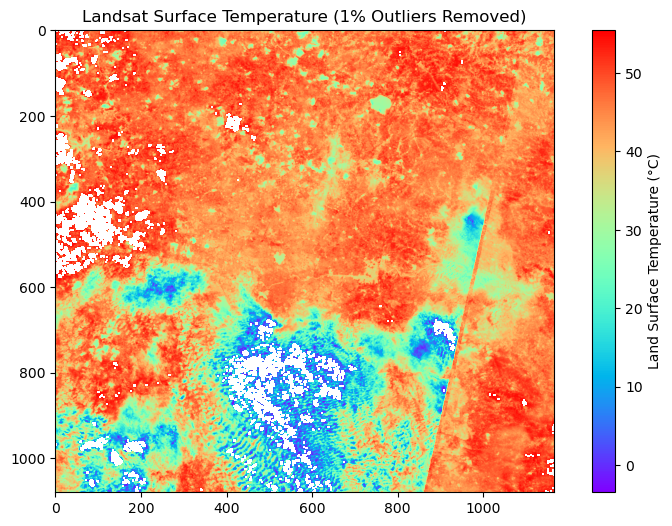

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(st_cleaned, cmap="rainbow")  # Adjust based on your data
plt.colorbar(label="Land Surface Temperature (°C)")
plt.title("Landsat Surface Temperature (1% Outliers Removed)")
plt.show()


In [11]:
cloud

array([[21824, 21824, 21824, ..., 21824, 21824, 21824],
       [21824, 21824, 21824, ..., 21824, 21824, 21824],
       [21824, 21824, 21824, ..., 21824, 21824, 21824],
       ...,
       [22052, 22052, 22052, ..., 21824, 21824, 21824],
       [22052, 22052, 22052, ..., 21824, 21824, 21824],
       [22052, 22052, 22052, ..., 21824, 21824, 21824]])

In [12]:
LST_C

array([[53.26745513, 51.62680553, 50.37922823, ..., 46.92361001,
        47.71659065, 47.7422258 ],
       [54.22962776, 53.89978883, 51.57895325, ..., 47.68241045,
        47.82938531, 47.55765272],
       [55.53702041, 55.47378704, 53.56824089, ..., 46.86208565,
        46.60915217, 45.45044339],
       ...,
       [27.31613828, 28.34325329, 31.73051111, ..., 51.88486604,
        51.82505069, 51.86606693],
       [28.46117498, 29.36353226, 29.18066819, ..., 52.0147508 ,
        51.86606693, 51.20126204],
       [29.38574939, 30.30006974, 29.5925396 , ..., 52.56334301,
        51.63535058, 50.71932122]])

In [13]:
np.nanmean(LST_C)

38.92196880842627

In [14]:
np.shape(LST_C)

(1080, 1165)

In [15]:
np.nanmax(LST_C)

72.53141585000003

In [16]:
print(cloud)

[[21824 21824 21824 ... 21824 21824 21824]
 [21824 21824 21824 ... 21824 21824 21824]
 [21824 21824 21824 ... 21824 21824 21824]
 ...
 [22052 22052 22052 ... 21824 21824 21824]
 [22052 22052 22052 ... 21824 21824 21824]
 [22052 22052 22052 ... 21824 21824 21824]]


In [17]:
lst_c2=LST_C

In [18]:
too_high=0
nan_count=0
for i in range(len(unc)):
    for j in range(len(unc[0])):
        if (cloud[i][j] >> 3)&1 == 1 or unc[i][j]>=6:
            lst_c2[i][j]=np.nan
            nan_count+=1
        if LST_C[i][j]>=55:
            too_high+=1

In [19]:
(22052>>3)&1

0

In [20]:
print(too_high, nan_count)

15749 251992


In [21]:
lst_c2

array([[53.26745513, 51.62680553, 50.37922823, ..., 46.92361001,
        47.71659065, 47.7422258 ],
       [54.22962776, 53.89978883, 51.57895325, ..., 47.68241045,
        47.82938531, 47.55765272],
       [55.53702041, 55.47378704, 53.56824089, ..., 46.86208565,
        46.60915217, 45.45044339],
       ...,
       [27.31613828, 28.34325329, 31.73051111, ..., 51.88486604,
        51.82505069, 51.86606693],
       [28.46117498, 29.36353226, 29.18066819, ..., 52.0147508 ,
        51.86606693, 51.20126204],
       [29.38574939, 30.30006974, 29.5925396 , ..., 52.56334301,
        51.63535058, 50.71932122]])

In [22]:
print(lst_celsius)

[[40.10818182 41.498      41.81363636 ... 36.57       37.17307692
  37.70833333]
 [41.166      40.87545455 40.87       ... 36.34076923 36.27461538
  36.69153846]
 [41.102      40.63727273 40.45666667 ... 36.51769231 36.93153846
  36.60333333]
 ...
 [37.39307692 37.75461538 38.26230769 ... 37.34230769 36.50230769
  36.00846154]
 [37.98076923 37.49461538 37.39923077 ... 38.10230769 37.52076923
  37.40846154]
 [37.84538462 37.33923077 36.22846154 ... 38.91       38.90076923
  38.87923077]]


In [23]:
np.max(lst_celsius)

44.8936363636364

In [24]:
np.min(lst_celsius)

28.460769230769245

In [25]:
np.nanmax(lst_c2)

72.53141585000003

In [26]:
np.nanmin(lst_c2)

6.736239860000012

In [ ]:
for i in range(19,25):
    os.makedirs(rf"C:\Users\rishi\ml_projects\UHI\Landsat_{i}\LST",exist_ok=True)